## Change sys.path to use my tensortrade instead of the one in env

In [1]:
import sys
sys.path.append("/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader")
sys.path.append("/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/GetOldTweets")
print(sys.path)

['/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python36.zip', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6/lib-dynload', '', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/env3/lib/python3.6/site-packages', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/env3/lib/python3.6/site-packages/IPython/extensions', '/Users/jasonfiacco/.ipython', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/GetOldTweets']


## Read in the PredictIt Data  
Adds ALL TA features at first. Also creates the "price_norm" metric which is close/open.

In [2]:
import ssl
import pandas as pd
import ta
from datetime import datetime, timedelta

ssl._create_default_https_context = ssl._create_unverified_context # Only used if pandas gives a SSLError

def fetch_data(symbol, sentiment_keyword=None, add_ta=False):
    path = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/predictit_datasets/"
    filename = "{}.xlsx".format(symbol)



    df = pd.read_excel(path + filename, skiprows=4)
    df = df.set_index("Date")
    df = df.drop(df.columns[[7,8,9]], axis=1)
    df = df.drop("ID", 1)
    
    
    #Get the normalized price_norm column
    df['price_norm'] = df['Close']/df['Open']
    
    
    #Rename
    df.columns = [symbol + ":" + name.lower() for name in df.columns]
    
    #Add all the TA extra features
    if add_ta:
        ta.add_all_ta_features(
            df, 
            colprefix=symbol+":",
            **{k: symbol+":" + k for k in ['open', 'high', 'low', 'close', 'volume']}
        )

    return df

In [3]:
all_data = pd.concat([
    fetch_data("WARREN", add_ta=True),
    fetch_data("CRUZ", add_ta=True),
    fetch_data("MANCHIN", add_ta=True),
    fetch_data("SANDERS", add_ta=True),
    fetch_data("NELSON", add_ta=True),
    fetch_data("DONNELLY", add_ta=True),
    fetch_data("PELOSI", add_ta=True),
    fetch_data("MANAFORT", add_ta=True),
    fetch_data("BROWN", add_ta=True),
    fetch_data("RYAN", add_ta=True),
    fetch_data("STABENOW", add_ta=True)
], axis=1)
all_data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jasonfiacco/Documents/Yale/Senior/thesis/predictit_datasets/WARREN.xlsx'

## Plot the closing prices for all the markets

In [4]:
import matplotlib.pyplot as plt
closing_prices = all_data.loc[:, [("close" in name) for name in all_data.columns]]
closing_prices.plot(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing prices of all markets")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()

NameError: name 'all_data' is not defined

## Slice just a specific time period from the dataframe

In [29]:
all_data.index = pd.to_datetime(all_data.index)

In [30]:
subset_data = all_data[(all_data.index >= '09-01-2017') & (all_data.index <= '02-01-2019')]
subset_data.head()

,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,WARREN:price_norm,WARREN:volume_adi,WARREN:volume_obv,WARREN:volume_cmf,...,STABENOW:momentum_uo,STABENOW:momentum_stoch,STABENOW:momentum_stoch_signal,STABENOW:momentum_wr,STABENOW:momentum_ao,STABENOW:momentum_kama,STABENOW:momentum_roc,STABENOW:others_dr,STABENOW:others_dlr,STABENOW:others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,0.85,0.85,0.85,0.85,0,0.0000,1.000000,-5981.533333,1608,-0.436170,...,59.385809,65.000000,76.019900,-35.000000,0.035765,0.686323,22.807018,-2.777778,-2.817088,NaN
2017-09-02,0.85,0.85,0.85,0.85,0,0.0000,1.000000,-5981.533333,1608,-0.436170,...,48.509615,65.000000,68.333333,-35.000000,0.030353,0.686861,12.903226,0.000000,0.000000,NaN
2017-09-03,0.85,0.84,0.85,0.84,74,0.8400,0.988235,-6055.533333,1534,-0.553371,...,56.737850,75.000000,68.333333,-25.000000,0.027353,0.687509,-1.369863,2.857143,2.817088,NaN
2017-09-04,0.84,0.84,0.85,0.85,10,0.8500,1.011905,-6045.533333,1544,-0.509589,...,55.483476,66.666667,68.888889,-33.333333,0.029618,0.688620,9.090909,0.000000,0.000000,NaN
2017-09-05,0.85,0.84,0.85,0.84,43,0.8479,0.988235,-6088.533333,1501,-0.558025,...,55.755297,85.714286,75.793651,-14.285714,0.031882,0.689066,2.857143,0.000000,0.000000,NaN


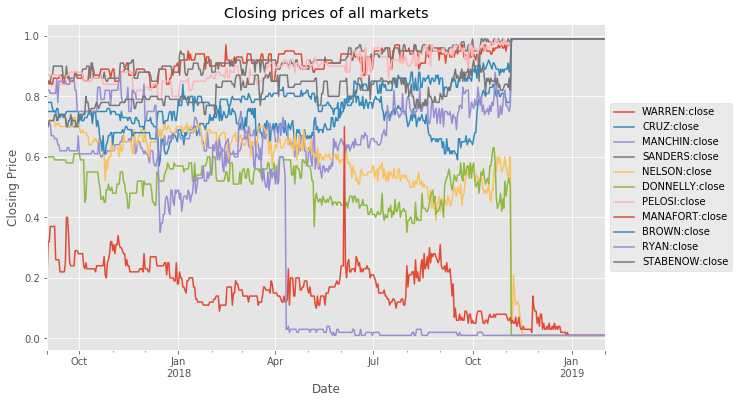

In [31]:
closing_prices = subset_data.loc[:, [("close" in name) for name in subset_data.columns]]
closing_prices.plot(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing prices of all markets")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()

## Define The Exchange

An exchange needs a name, an execution service, and streams of price data in order to function properly.

The setups supported right now are the simulated execution service using simulated or stochastic data. More execution services will be made available in the future, as well as price streams so that live data and execution can be supported.

In [5]:
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream

#Exchange(name of exchange, service)
#It looks like each Stream takes a name, and then a list of the closing prices.

predictit_exch = Exchange("predictit", service=execute_order)(
    Stream("USD-WARREN", list(subset_data['WARREN:close'])),
    Stream("USD-CRUZ", list(subset_data['CRUZ:close'])),
    Stream("USD-MANCHIN", list(subset_data['MANCHIN:close'])),
    Stream("USD-SANDERS", list(subset_data['SANDERS:close'])),
    Stream("USD-NELSON", list(subset_data['NELSON:close'])),
    Stream("USD-DONNELLY", list(subset_data['DONNELLY:close'])),
    Stream("USD-PELOSI", list(subset_data['PELOSI:close'])),
    Stream("USD-MANAFORT", list(subset_data['MANAFORT:close'])),
    Stream("USD-BROWN", list(subset_data['BROWN:close'])),
    Stream("USD-RYAN", list(subset_data['RYAN:close'])),
    Stream("USD-STABENOW", list(subset_data['STABENOW:close']))
)

/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/env3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/env3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/env3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '

NameError: name 'subset_data' is not defined

Now that the exchanges have been defined we can define our features that we would like to include, excluding the prices we have provided for the exchanges.

## Define "External Data Feed". This is where you specify custom features

In [33]:
#Select only the TA features to keep
features_to_keep = ["price_norm", "volume", "trend_cci", "momentum_rsi"]
feature_data = subset_data.loc[:, [(any(word in name for word in features_to_keep)) for name in subset_data.columns]]

#Remove any extra volume columns
feature_data = feature_data[feature_data.columns.drop(list(feature_data.filter(regex='volume_')))]

feature_data.head()

,WARREN:volume,WARREN:price_norm,WARREN:trend_cci,WARREN:momentum_rsi,CRUZ:volume,CRUZ:price_norm,CRUZ:trend_cci,CRUZ:momentum_rsi,MANCHIN:volume,MANCHIN:price_norm,...,BROWN:trend_cci,BROWN:momentum_rsi,RYAN:volume,RYAN:price_norm,RYAN:trend_cci,RYAN:momentum_rsi,STABENOW:volume,STABENOW:price_norm,STABENOW:trend_cci,STABENOW:momentum_rsi
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,0,1.000000,-80.808081,39.559696,940,1.012987,178.045515,68.003698,185,1.044118,...,66.666667,52.511983,0,1.000000,-55.555556,46.878766,16,0.972222,47.393365,50.311062
2017-09-02,0,1.000000,-74.561404,39.559696,0,1.000000,163.265306,68.003698,0,1.000000,...,66.666667,52.511983,0,1.000000,-55.555556,46.878766,45,1.000000,45.042160,50.311062
2017-09-03,74,0.988235,-111.904762,32.511005,0,1.000000,136.363636,68.003698,0,1.000000,...,66.666667,52.511983,0,1.000000,-55.555556,46.878766,1,1.028571,58.670007,53.297763
2017-09-04,10,1.011905,-81.871345,43.376235,0,1.000000,117.647059,68.003698,0,1.000000,...,66.666667,52.511983,120,0.987805,-101.503759,40.845343,0,1.000000,62.634063,53.297763
2017-09-05,43,0.988235,-101.092896,36.967017,0,1.000000,103.585657,68.003698,50,0.943662,...,60.606061,52.511983,52,1.000000,20.356234,40.845343,9,1.000000,60.168472,53.297763


In [34]:
#Normalize the technical features
features_to_norm = ["volume", "trend_cci", "momentum_rsi"]
cols_to_norm = [name for name in feature_data.columns if any(word in name for word in features_to_norm) ]
feature_data[cols_to_norm] = feature_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
feature_data.head()

,WARREN:volume,WARREN:price_norm,WARREN:trend_cci,WARREN:momentum_rsi,CRUZ:volume,CRUZ:price_norm,CRUZ:trend_cci,CRUZ:momentum_rsi,MANCHIN:volume,MANCHIN:price_norm,...,BROWN:trend_cci,BROWN:momentum_rsi,RYAN:volume,RYAN:price_norm,RYAN:trend_cci,RYAN:momentum_rsi,STABENOW:volume,STABENOW:price_norm,STABENOW:trend_cci,STABENOW:momentum_rsi
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,0.000000,1.000000,0.403676,0.357186,0.002808,1.012987,0.711562,0.786935,0.001916,1.044118,...,0.549708,0.505893,0.000000,1.000000,0.967271,0.512535,0.000082,0.972222,0.680470,0.575608
2017-09-02,0.000000,1.000000,0.413031,0.357186,0.000000,1.000000,0.693546,0.786935,0.000000,1.000000,...,0.549708,0.505893,0.000000,1.000000,0.967271,0.512535,0.000230,1.000000,0.678582,0.575608
2017-09-03,0.002695,0.988235,0.357105,0.234853,0.000000,1.000000,0.660756,0.786935,0.000000,1.000000,...,0.549708,0.505893,0.000000,1.000000,0.967271,0.512535,0.000005,1.028571,0.689525,0.630811
2017-09-04,0.000364,1.011905,0.402083,0.423424,0.000000,1.000000,0.637942,0.786935,0.000000,1.000000,...,0.549708,0.505893,0.005399,0.987805,0.965189,0.422239,0.000000,1.000000,0.692708,0.630811
2017-09-05,0.001566,0.988235,0.373297,0.312189,0.000000,1.000000,0.620803,0.786935,0.000518,0.943662,...,0.542265,0.505893,0.002340,1.000000,0.970711,0.422239,0.000046,1.000000,0.690728,0.630811


In [35]:
#Add "Streams" for all my external added features.
from tensortrade.data import DataFeed, Module

with Module("predictit") as predictit_ns:
    predictit_nodes = [Stream(name, list(feature_data[name])) for name in feature_data.columns]
    

In [36]:
#Then create the Feed from it
external_feed = DataFeed([predictit_ns])
external_feed.next()

{'predictit:/WARREN:volume': 0.0,
 'predictit:/WARREN:price_norm': 1.0,
 'predictit:/WARREN:trend_cci': 0.4036756304414346,
 'predictit:/WARREN:momentum_rsi': 0.35718628615104175,
 'predictit:/CRUZ:volume': 0.0028076463560334527,
 'predictit:/CRUZ:price_norm': 1.012987012987013,
 'predictit:/CRUZ:trend_cci': 0.7115617565116659,
 'predictit:/CRUZ:momentum_rsi': 0.7869349272069611,
 'predictit:/MANCHIN:volume': 0.001916065954097274,
 'predictit:/MANCHIN:price_norm': 1.0441176470588234,
 'predictit:/MANCHIN:trend_cci': 0.925804688377535,
 'predictit:/MANCHIN:momentum_rsi': 0.8095794663023808,
 'predictit:/SANDERS:volume': 0.0,
 'predictit:/SANDERS:price_norm': 1.0,
 'predictit:/SANDERS:trend_cci': 0.3072513672803388,
 'predictit:/SANDERS:momentum_rsi': 0.34242116152293745,
 'predictit:/NELSON:volume': 0.0,
 'predictit:/NELSON:price_norm': 1.0,
 'predictit:/NELSON:trend_cci': 0.016925133468624048,
 'predictit:/NELSON:momentum_rsi': 0.7408481956126248,
 'predictit:/DONNELLY:volume': 0.00019

## Portfolio

Make the portfolio using the any combinations of exchanges and intruments that the exchange supports

In [37]:
#I am going to have to add "instruments" for all 25 of the PredictIt markets I'm working with.
from tensortrade.instruments import USD, WARREN, CRUZ, MANCHIN, SANDERS, NELSON, DONNELLY,\
                                PELOSI, MANAFORT, BROWN, RYAN, STABENOW
from tensortrade.wallets import Wallet, Portfolio

portfolio = Portfolio(USD, [
    Wallet(predictit_exch, 10000 * USD),
    Wallet(predictit_exch, 0 * WARREN),
    Wallet(predictit_exch, 0 * CRUZ),
    Wallet(predictit_exch, 0 * MANCHIN),
    Wallet(predictit_exch, 0 * SANDERS),
    Wallet(predictit_exch, 0 * NELSON),
    Wallet(predictit_exch, 0 * DONNELLY),
    Wallet(predictit_exch, 0 * PELOSI),
    Wallet(predictit_exch, 0 * MANAFORT),
    Wallet(predictit_exch, 0 * BROWN),
    Wallet(predictit_exch, 0 * RYAN),
    Wallet(predictit_exch, 0 * STABENOW)
])

## First Launch Ray. 
This is where you define our training "Trading Enviroment," which includes things such as the action scheme, the reward scheme, the window size, and whether or not to use the "interal feed" (internal data feed has all the price data from the wallets and the networth of the portfolio).

In [38]:
#Add the deeptrader path to ALL workers, not just the current worker
import os
parent_dir = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader"
os.environ["PYTHONPATH"] = parent_dir + ":" + os.environ.get("PYTHONPATH", "")

In [39]:
#Try and get rid of that yaml warning (although this only does it for THIS worker)
import yaml
yaml.warnings({'YAMLLoadWarning': False})

In [40]:
# Environment
from tensortrade.environments import TradingEnvironment


import gym
import ray
from ray import tune
from ray.tune import grid_search
from ray.tune.registry import register_env

import ray.rllib.agents.ppo as ppo
import ray.rllib.agents.dqn as dqn
from ray.tune.logger import pretty_print
from tensortrade.rewards import RiskAdjustedReturns
    
class RayTradingEnv(TradingEnvironment):
    def __init__(self):        
        env = TradingEnvironment(
            feed=external_feed,
            portfolio=portfolio,
            action_scheme="simple",
            reward_scheme="risk-adjusted",
            window_size=15,
            enable_logger=False,
            renderers = 'screenlog'
        ) 
        self.env = env
        self.action_space = self.env.action_space
        self.observation_space = self.env.observation_space
        
        

    def reset(self):
        return self.env.reset()

    def step(self, action):
        return self.env.step(action)

def env_creator(env_config):
    return RayTradingEnv()

register_env("ray_trading_env", env_creator)


#ray.init(ignore_reinit_error=True, local_mode=True)

## Train using Tune

In [16]:
# Population based training
from ray.tune.schedulers import PopulationBasedTraining
import random

pbt = PopulationBasedTraining(
    time_attr="time_total_s",
    metric="episode_reward_mean",
    mode="max",
    perturbation_interval=240, #Every 10,000 steps, consider changing learning rate
    hyperparam_mutations={
        "lr": lambda: random.uniform(.00001, .01),
        #"train_batch_size": lambda: random.uniform(10, 100),
    } 
)

In [41]:
analysis = tune.run(
        "DQN",
        name = "DQN30",
        #scheduler=pbt, #Use Population Based Training
        #num_samples=4, #Number of different hyperparameters to sample
        #reuse_actors=True,
        checkpoint_freq = 50,
        checkpoint_at_end=True,
        stop={
            "timesteps_total": 1000000,
        },
        config={
            "env": "ray_trading_env",
            "lr": .0004,  # try different lrs
            "num_workers": 1,  # parallelism,
            #"eager": "true",
        },
        
    )

2020-03-18 14:53:25,713	INFO resource_spec.py:212 -- Starting Ray with 3.76 GiB memory available for workers and up to 1.88 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-18 14:53:26,168	INFO services.py:1078 -- View the Ray dashboard at localhost:8266


Trial name,status,loc
DQN_ray_trading_env_c047dbfa,RUNNING,


(pid=82093) 2020-03-18 14:53:33,690	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
(pid=82093) 2020-03-18 14:53:36,137	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=82093) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning:
(pid=82093) 
(pid=82093) calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=82093) 
(pid=82093) 2020-03-18 14:53:37,851	WARNING util.py:37 -- Install gputil for GPU system monitoring.
(pid=82095) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning:
(pid=82095) 
(pid=82095) calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Ple

Result for DQN_ray_trading_env_c047dbfa:
  custom_metrics: {}
  date: 2020-03-18_14-54-23
  done: false
  episode_len_mean: 518.0
  episode_reward_max: -297930422.0127315
  episode_reward_mean: -297930422.0127315
  episode_reward_min: -297930422.0127315
  episodes_this_iter: 1
  episodes_total: 1
  experiment_id: 7b34c1f43f004347a4e5c8db00f53452
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 1.0
    grad_time_ms: .nan
    learner: {}
    num_steps_sampled: 1000
    num_steps_trained: 0
    num_target_updates: 1
    opt_peak_throughput: 0.0
    opt_samples: .nan
    replay_time_ms: .nan
    sample_time_ms: 138.591
    update_time_ms: 12.531
  iterations_since_restore: 1
  node_ip: 192.168.0.175
  num_healthy_workers: 1
  off_policy_estimator: {}
  perf:
    cpu_util_percent: 22.48
    ram_util_percent: 61.167692307692306
  pid: 82093
  policy_reward_max: {}
  policy_reward_mean: {}
  policy_reward_min: {}
  sampler_perf:
    mean_e

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_c047dbfa,RUNNING,192.168.0.175:82093,-2.9793e+08,45.3587,1000,1


(pid=82093) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning:
(pid=82093) 
(pid=82093) Mean of empty slice.
(pid=82093) 
(pid=82093) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning:
(pid=82093) 
(pid=82093) invalid value encountered in double_scalars
(pid=82093) 
Result for DQN_ray_trading_env_c047dbfa:
  custom_metrics: {}
  date: 2020-03-18_14-55-04
  done: false
  episode_len_mean: 518.0
  episode_reward_max: 1003061290.6816776
  episode_reward_mean: 141431464.1240594
  episode_reward_min: -297930422.0127315
  episodes_this_iter: 2
  episodes_total: 3
  experiment_id: 7b34c1f43f004347a4e5c8db00f53452
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 1.0
    grad_time_ms: 10.543
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 48.1970901489

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_c047dbfa,RUNNING,192.168.0.175:82093,1.41431e+08,86.496,2000,2


Result for DQN_ray_trading_env_c047dbfa:
  custom_metrics: {}
  date: 2020-03-18_14-55-43
  done: false
  episode_len_mean: 518.0
  episode_reward_max: 1003061290.6816776
  episode_reward_mean: 44550129.828772165
  episode_reward_min: -297930422.0127315
  episodes_this_iter: 2
  episodes_total: 5
  experiment_id: 7b34c1f43f004347a4e5c8db00f53452
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.9020000100135803
    grad_time_ms: 10.21
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 365.1583557128906
        mean_q: -35.64567184448242
        mean_td_error: 7503443.5
        mean_td_error_squared: 56301665124352.0
        min_q: -309.9271240234375
        model: {}
    num_steps_sampled: 3000
    num_steps_trained: 16000
    num_target_updates: 5
    opt_peak_throughput: 3134.076
    opt_samples: 32.0
    replay_time_ms: 4.261
    sample_time_ms: 150.319
    update_time_ms: 9.744
  iterations

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_c047dbfa,RUNNING,192.168.0.175:82093,4.45501e+07,125.21,3000,3


KeyboardInterrupt: 

In [ ]:
#Use the below command to see results on Tensorbard
#tensorboard --logdir=/Users/jasonfiacco/ray_results/DQN2

In [ ]:
#Now you can plot the reward results of your tuner (same thing shows up in Tensorboard)
dfs = analysis.trial_dataframes

ax = None
for d in dfs.values():
    ax = d.episode_reward_mean.plot(ax=ax, legend=True)

## Restoring an already existing agent that I tuned

In [ ]:
#Only need to call this if tune.run() wasn't used.
ray.init()

In [18]:
#First set up the trainer (which should really be called the "tester"). 
#Use only 1 worker for this cause we don't need more

config = dqn.DEFAULT_CONFIG.copy()
config["num_workers"] = 1

#config['log_level'] = "DEBUG"

trainer = dqn.DQNTrainer(config=config, env="ray_trading_env")

config

2020-03-16 14:54:57,556	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2020-03-16 14:54:57,754	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2020-03-16 14:55:03,090	WARNING util.py:37 -- Install gputil for GPU system monitoring.


{'num_workers': 1,
 'num_envs_per_worker': 1,
 'sample_batch_size': 4,
 'batch_mode': 'truncate_episodes',
 'num_gpus': 0,
 'train_batch_size': 32,
 'model': {'conv_filters': None,
  'conv_activation': 'relu',
  'fcnet_activation': 'tanh',
  'fcnet_hiddens': [256, 256],
  'free_log_std': False,
  'no_final_linear': False,
  'vf_share_layers': True,
  'use_lstm': False,
  'max_seq_len': 20,
  'lstm_cell_size': 256,
  'lstm_use_prev_action_reward': False,
  'state_shape': None,
  'framestack': True,
  'dim': 84,
  'grayscale': False,
  'zero_mean': True,
  'custom_model': None,
  'custom_action_dist': None,
  'custom_options': {},
  'custom_preprocessor': None},
 'optimizer': {},
 'gamma': 0.99,
 'horizon': None,
 'soft_horizon': False,
 'no_done_at_end': False,
 'env_config': {},
 'env': None,
 'normalize_actions': False,
 'clip_rewards': None,
 'clip_actions': True,
 'preprocessor_pref': 'deepmind',
 'lr': 0.0005,
 'monitor': False,
 'log_level': 'WARN',
 'callbacks': {'on_episode_star

2020-03-16 14:55:12,908	WARNING worker.py:1058 -- The actor or task with ID fffffffffffffffffb48fa420100 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {object_store_memory: 1.806641 GiB}, {node:192.168.0.175: 1.000000}, {memory: 5.224609 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.


In [ ]:
#Now restore the agent by quering the directory of the best agent from the recent tune run.
import os
logdir = analysis.get_best_logdir("episode_reward_mean", mode="max")
trainer.restore(os.path.join(logdir, "checkpoint_100/checkpoint-100"))

In [ ]:
#Do it with an absolute path
trainer.restore(checkpoint_path="/Users/jasonfiacco/ray_results/DQN29/DDQN_ray_trading_env_36ef7b46_2_2020-03-15_19-10-51rdwowlzk/checkpoint_200/checkpoint-200")


## Testing (test on a new or the same environment)

In [ ]:
#Set up a testing environment with test data.
test_env = TradingEnvironment(
    feed=external_feed,
    portfolio=portfolio,
    action_scheme='simple',
    reward_scheme='risk-adjusted',
    window_size=15,
    enable_logger=False,
    renderers = 'screenlog'
)

In [ ]:
#Run the test. One episode only.
for episode_num in range(1):
    state = test_env.reset()
    done = False
    cumulative_reward = 0
    step = 0
    action = trainer.compute_action(state)

    while not done:
        action = trainer.compute_action(state)
        state, reward, done, results = test_env.step(action)

        cumulative_reward += reward
        
        #Render every 100 steps:
        if step % 100 == 0:
            test_env.render()
            
        step += 1
        
print("Cumulative reward: ", cumulative_reward)

## Plot the Results

In [ ]:
#Set all of the formatting parameters
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

In [ ]:
#Plot the networth
#dates = subset_data.index
plt.figure(figsize=(10, 6), tight_layout=True)
plt.plot(portfolio.performance.index, portfolio.performance['net_worth'], label="Net Worth")
plt.xlabel("Step")
plt.ylabel("Net Worth in Dollars")
plt.title("Net worth of DQN Agent")
plt.show()

In [ ]:
### Plot the total balance in each type of item
#First get the worth columns
p = portfolio.performance
p2 = p.iloc[:, :]
weights = p2.loc[:, [("/worth" in name) for name in p2.columns]]

#Now plot
weights.iloc[:,:].plot(figsize=(10, 6))
plt.xlabel("Step")
plt.ylabel("Weight in Total Value")
plt.title("Weight in Each Security over Time")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()


## Extra Stuff

In [ ]:
apath = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/jasonfiacco-selectedmarkets-mytickers.xlsx"
df = pd.read_excel(apath, skiprows=2)
jason_tickers = df.iloc[:, 5].tolist()
descriptions = df.iloc[:, 1].tolist()

for ticker, description in zip(jason_tickers, descriptions):
    l = "{} = Instrument(\'{}\', 2, \'{}\')".format(ticker, ticker, description)
    print(l)